# Capital BikeShare Bike Demand Prediction

memprediksi banyaknya sepeda yang harus disediakan dalam suatu kondisi tertentu

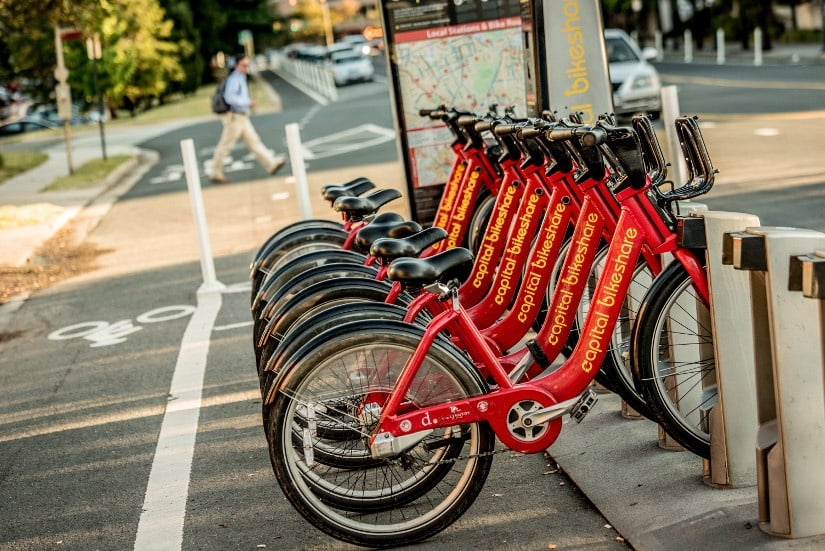

# Context 
---


Sistem bike sharing merupakan terobosan baru dari model penyewaan sepeda tradisional di mana seluruh proses mulai dari keanggotaan,pembayaran, penyewaan serta pengembalian kembali telah di-otomatisasi. Melalui sistem bike sharing ini, pengguna dapat dengan mudah menyewa sepeda dari lokasi tertentu dan mengembalikannya kembali di lokasi yang lain. Saat ini, terdapat lebih dari 500 program bike sharing di seluruh dunia yang terdiri dari lebih dari 500 ribu sepeda. Saat ini, terdapat minat yang besar terhadap sistem ini karena peran pentingnya dalam lalu lintas, biaya transportasi serta masalah lingkungan dan kesehatan. 

Menariknya sistem bike sharing ini pada penerapanya di dunia nyata, membuat pemerintah Washington memutuskan untuk terjun kedalam bisnis bike sharing di wilayah mereka dengan nama Capital Bikeshare, Capital Bikeshare dimiliki oleh pemerintah daerah dan dioperasikan oleh operator swasta Alta Bike Share, dimana Alta Bike Share yang menerima kontrak untuk menjalakan operasi Capital Bikeshare dengan Biaya perencanaan dan implementasi untuk sistem baru ini mencapai 5 juta dollar.

# Problem
---
Tentunya banyak tantangan yang muncul dalam bisnis transportasi berbasis sepeda ini, apalagi bagi Capital Bikeshare yang notabene sebagai pemain baru yang terjun kedalam bisnis ini, salah satunya adalah capital bikeshare harus mampu untuk menyediakan jumlah unit sepeda yang tepat di setiap kondisi dan situasi. Karena jika tidak mampu menyediakan sepeda dengan jumlah yang tepat, maka bisa terjadi kegagalan dalam memenuhi tuntutan dari pelanggan yang bisa berakibat hilangnya kepercayaan pelanggan. Namun apabila jumlah ketersediaan sepeda terlalu banyak, hal itu bisa menyebabkan banyaknya unit sepeda yang tidak terpakai, atau kurang efisien. Dimana hal tersebut bisa berdampak pada biaya operasional yang mencakup biaya manajemen, logistik, serta perawatan untuk tiap unit sepeda.

# Goals
---
Dari masalah diatas, Capital Bikeshare perlu memiliki alat yang berguna untuk memprediksi serta membantu tiap stakeholder yang terkait (divisi operasi maupun Capital Bikeshare itu sendiri) untuk dapat menentukan jumlah unit sepeda yang perlu disediakan dengan tepat di setiap situasi dan kondisi. Adanya perbedaan musim, cuaca, kelembaban dan suhu dapat menambah tingkat akurasi prediksi jumlah unit sepeda yang perlu disediakan. Dimana hal tersebut dapat menjaga efisiensi operational cost dari sisi Capital Bikeshare dan efisiensi kerja dari divisi operasi.

Stakeholders:
* Capital bike share executive teams: untuk melakukan persetujuan project dan strategi optimalisasi biaya operasi.  
* Operation division: efisiensi kerja departemen operasi (menyiapkan sepeda dalam jumlah tertentu, tidak semua).

# Approach
---
kita akan melakukan analisis terhadap dataset untuk menemukan pola dari feature yang tersedia, pembeda antara berbagai kondisi, serta bagaimana perilaku setiap feature dalam mempengaruhi jumlah unit sepeda yang perlu disediakan. Selanjutnya, kita akan membangun sebuah model regresi yang akan membantu dalam menentukan jumlah unit sepeda yang perlu disediakan oleh Capital Bikeshare.

# Metric Evaluation
---
Dalam mengevaluasi tingkat akurasi model, kami akan menggunakan tiga metrik: RMSE, MAE, dan MAPE. Metrik-metrik ini memberikan gambaran mengenai kinerja model regresi:

- RMSE (Root Mean Squared Error) menghitung akar kuadrat rata-rata dari kesalahan, yang memberikan ukuran deviasi keseluruhan antara nilai yang diprediksi dan nilai aktual.

- MAE (Mean Absolute Error) menghitung perbedaan absolut rata-rata antara nilai yang diprediksi dan nilai aktual, memberikan ukuran langsung dari keakuratan model.

- MAPE (Mean Absolute Percentage Error) menghitung perbedaan persentase rata-rata antara nilai yang diprediksi dan nilai aktual, yang memungkinkan kita untuk menilai besarnya kesalahan relatif.

Dengan melihat nilai RMSE, MAE, dan MAPE, kita dapat mengukur tingkat akurasi model dalam memprediksi jumlah unit sepeda dengan mempertimbangkan keterbatasan feature-feature yang digunakan. Nilai yang lebih rendah dari metrik-metrik ini mengindikasikan tingkat akurasi yang lebih tinggi dalam prediksi.

# Data Understanding
---
- Dataset merupakan data peminjaman sepeda di sistem *Capital Bikeshare* dalam rentang tahun 2011-2012.
- Setiap baris data merepresentasikan informasi terkait waktu peminjaman, cuaca, dan musim yang sesuai.

### Attribute Information

| Columns                                            | Definition                                                   | 
| ------------------------------------------------- | ------------------------------------------------------------ |
| dteday | date |
| hum | normalized humidity. The values are divided into 100 (max) |
| weathersit | 1: Clear, Few clouds, Partly cloudy, Partly cloudy<br> 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br> 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br> 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog |
| holiday | 0: not holiday<br> 1: holiday|
| season | 1: winter<br> 2: spring<br> 3: summer<br> 4: fall |
| atemp | Normalized feeling temperature in Celsius. |
| temp | normalized temperature in Celsius. |
| hr | hour (0 to 23) |
| casual | count of casual users |
| registered | count of registered users |
| cnt | count of total rental bikes including both casual and registered |

# Load Libraries
---

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn

#pd.set_option('display.max_colwidth', 2000)
import warnings
warnings.filterwarnings('ignore')

# Load Dataset
---

In [2]:
data = pd.read_csv('C:/Users/Ihza/Documents/Capstone_Project_3/data/data_bike_sharing.csv')
display(data.head())

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


In [3]:
# Membuat duplikasi dataframe
data = data.copy()

## Exploratory Data Analysis
---

kita melakukan Exploratory Data Analysis menggunakan ydata_profiling yang dapat diakses pada [Notebook_EDA](C:/Users/Ihza/Documents/Capstone_Project_3/notebooks/Exploratory_data_analysis.ipynb)

# Data Preprocessing
---

Pada tahap ini, kita akan melakukan set-up atau cleaning pada data set agar data siap digunakan untuk analisis dan modelling. Beberapa hal yang perlu dilakukan adalah:

- Melakukan pengecekan missing value dan data duplikat.
- Melakukan penyesuaian beberapa nama kolom dan value untuk memudahkan keterbacaan data.
- Mengubah beberapa tipe data pada feature agar sesuai dengan nilai yang dimiliki.
- Melakukan penggabungan value dalam feature untuk keperla modelling.
- Drop feature yang tidak memiliki relevansi terhadap permasalahan yang sedang dihadapi.
- Mengecek korelasi antar data.
- Mengecek outlier pada data numerik.

### Check Missing Data

<Axes: >

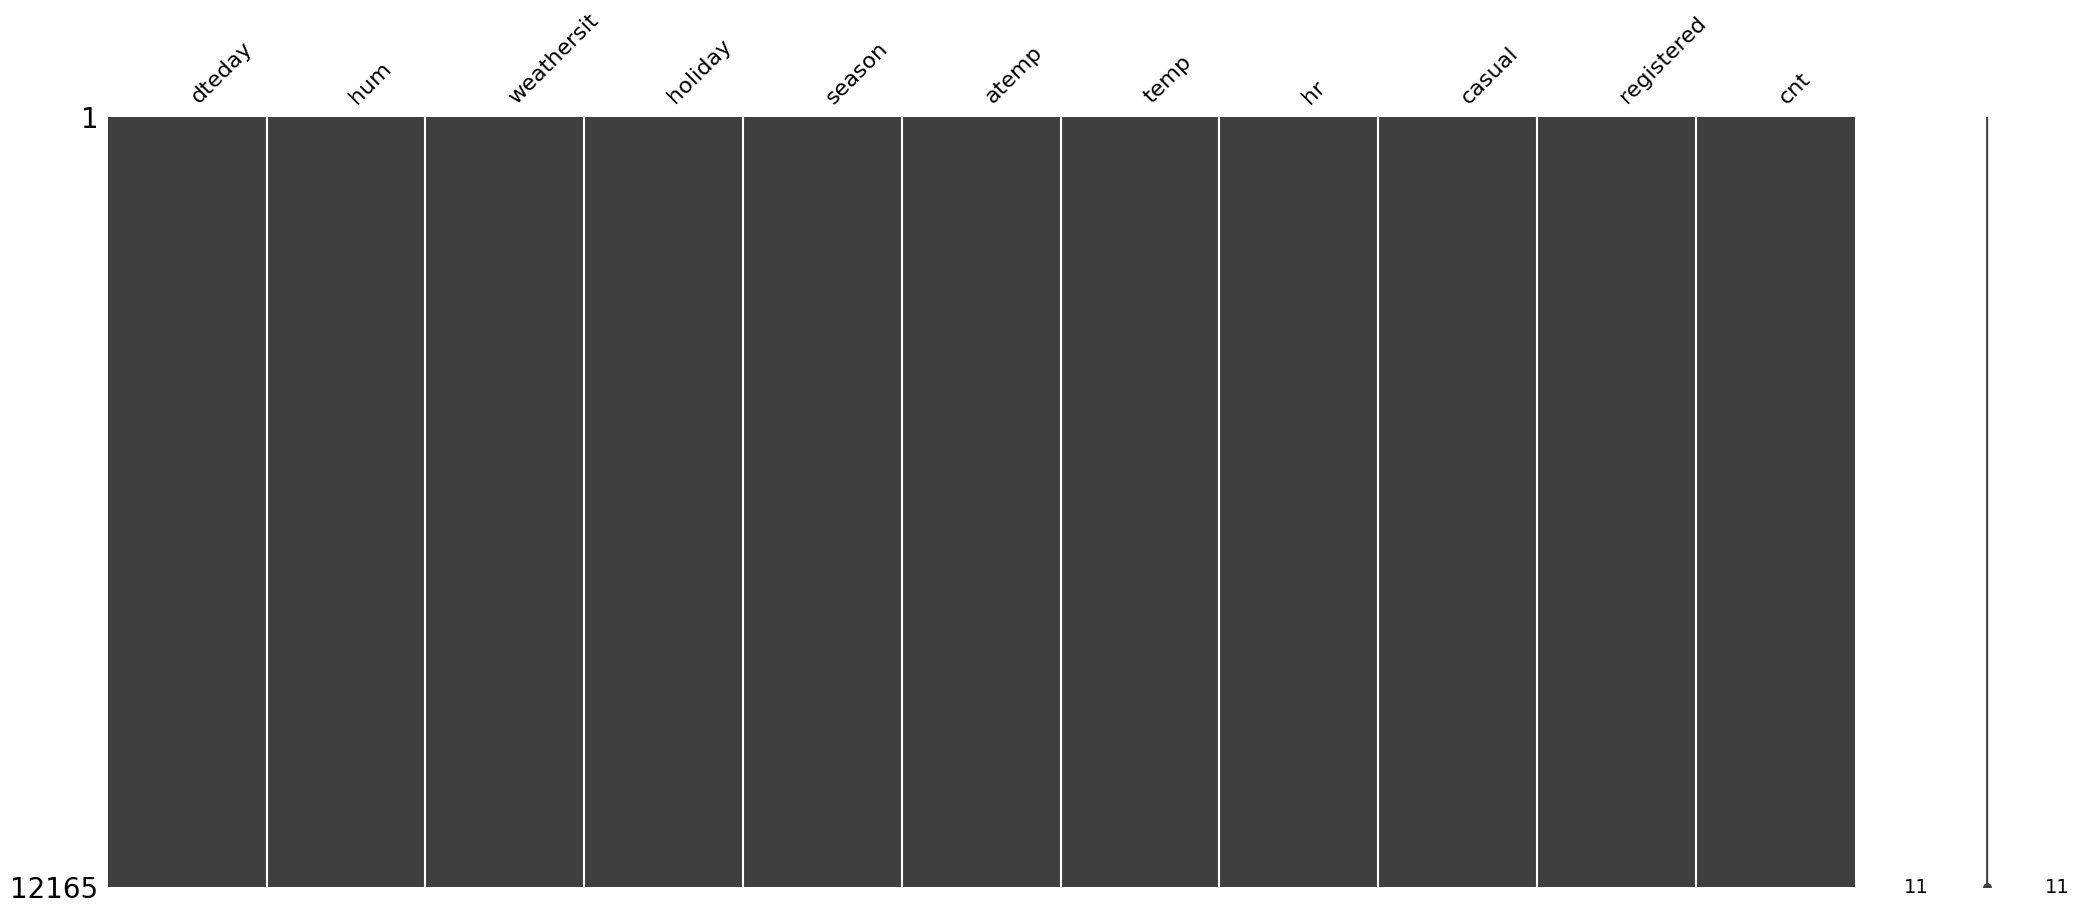

In [4]:
# Missing value heatmap
msn.matrix(data)

In [5]:
data.isna().sum()

dteday        0
hum           0
weathersit    0
holiday       0
season        0
atemp         0
temp          0
hr            0
casual        0
registered    0
cnt           0
dtype: int64

Setelah melakukan pemeriksaan data, terlihat bahwa tidak ada nilai yang hilang pada salah satu atribut dataset. Hal ini mengindikasikan bahwa dataset sudah lengkap, dan tidak perlu penanganan lebih lanjut terhadap data yang hilang.

### Check Duplicate

In [6]:
data.duplicated().sum()

0

Setelah memeriksa dataset, dapat diidentifikasi bahwa tidak ada data duplikat dalam dataset.

### Column and Value Adjustment

In [7]:
# Merubah nama kolom untuk memperjelas dataset
data = data.rename(columns={'weathersit':'weather',
                       'dteday':'date',
                       'hr':'hour',
                       'temp' : 'temperature',
                       'hum' : 'humidity',
                       'cnt':'count'})

In [8]:
# Mengubah tipe data 'date' menjadi DateTime
data['date'] = data['date'].astype('datetime64')

# mengrutkan dataset berdasarkan Tanggal dan Jam
data = data.sort_values(['date', 'hour']).reset_index(drop=True)

# Membuat kolom untuk memisahkan data Bulan dan Hari
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day_name()

In [9]:
# Mengubah tipe data feature 'holiday', 'year', dan 'month' menjadi category
data['year'] = data['year'].astype('category')
data['holiday'] = data['holiday'].astype('category')
data['month'] = data['month'].astype('category')

In [10]:
# Mengubah value kolom 'season' dan 'weathersit' dari numerik menjadi penamaan kategori yang sesuai
data['season'] = data['season'].replace({1:'winter', 2:'spring', 3:'summer', 4:'fall'})
data['weather'] = data['weather'].replace({1:'clear', 2:'cloudy', 3:'Light rain/snow', 4:'Heavy rain/Snow'})


In [11]:
# Gabungkan weather heavy rain ke light rain
data['weather'].replace(to_replace='Heavy rain/Snow', value='Light rain/snow', inplace=True)

### Drop Columns

Melakukan drop pada feature tertentu. Sebagai pertimbangan, kita dapat menggunakan domain knowledge untuk memutuskan feature-feature yang tidak memiliki relevansi.

* Dilihat berdasarkan domain knowledge, feature `Casual` dan `Registered` tidak memiliki relevansi dan kepentingan untuk analisis prediktif. Hal tersebut diakibatkan karena analisis prediktif ini lebih menitikberatkan pada keseluruhan unit sepeda yang disewa, terlepas dari status penggunanya.
* kolom `date` juga akan di drop karena nilai-nilai yang terdapat di dalamnya sudah diwakili dengan kolom `year`, `month`, dan `day`

In [12]:
#Drop kolom yang tidak digunakan dalam modelling
data.drop(columns=['date', 'casual', 'registered'], inplace=True)

### Correlation

<Axes: title={'center': 'Correlation Matrix'}>

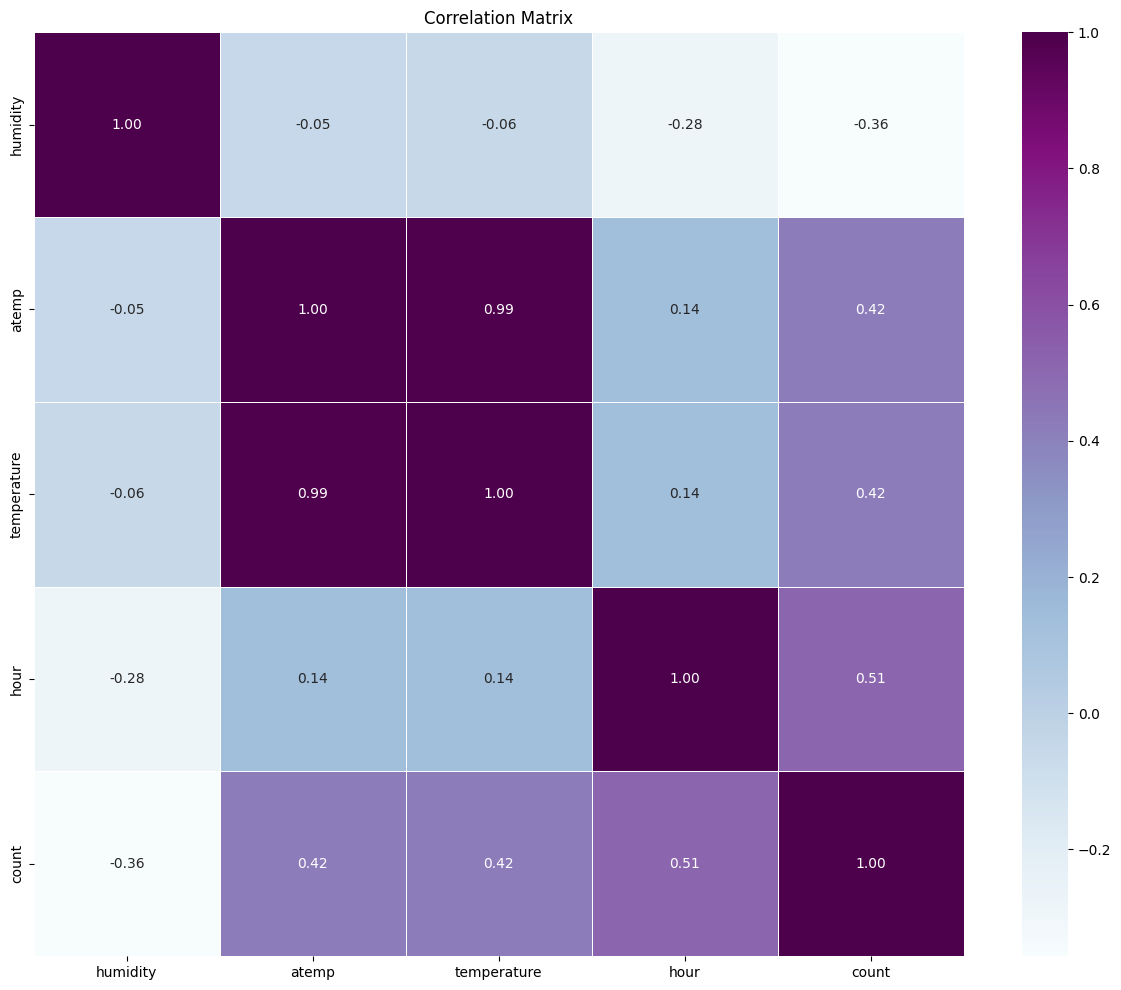

In [13]:
# Correlation matrix
plt.figure(figsize=(15, 12))
plt.title('Correlation Matrix')
corr = data.corr(method='spearman')
sns.heatmap(corr, annot=True, fmt='.2f', cmap='BuPu', linewidths=.5)


Dari hasil correlation matrix di atas menunjukkan bahwa ada beberapa feature yang memiliki korelasi terhadap  target (`count`). Korelasi positif paling tinggi dimiliki oleh feature `temp`, `atemp`, dan `hour`. Sedangkan untuk korelasi negatif paling tinggi dimiliki oleh feature `humidity`. Hal ini menandakan bahwa semakin tinggi humidity, semakin sedikit jumlah sepeda yang disewa.

Perlu diperhatikan pada correlation matrix diatas, korelasi antara kolom `temp` dan `atemp` sangat tinggi (0.99), hal ini mengindikasikan adanya multikolinearitas pada 2 kolom tersebut. Karena dua kolom tersebut menggambarkan sesuatu yang sama, dalam hal ini adalah temperature, maka salah satunya akan di drop, `atemp` adalah suhu yang dirasakan sedangkan `temp` adalah suhu asli, maka kolom `atemp` akan di drop.

In [14]:
# Drop kolom 'atemp' karena multicollinear dengan kolom 'temp'
data = data.drop('atemp', axis=1)

### Outliers

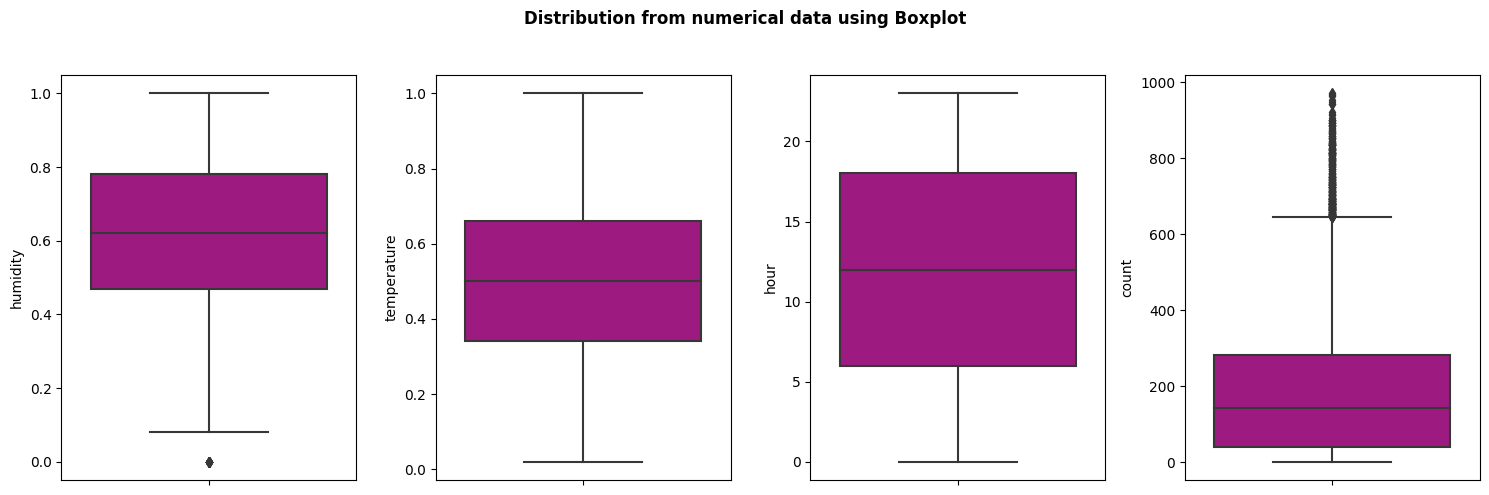

In [15]:
features = data.describe().columns
plt.figure(figsize=(15, 5))

for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data[features[i]], color='#b3058d', orient='v')
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)  

plt.suptitle('Distribution from numerical data using Boxplot', fontweight='bold', ha='center')
plt.show()


Dari grafik boxplot di atas, terdapat outliers yang cukup banyak pada feature `count` dan ada sedikit pada feature `humidity`. kita akan melakukan analisa terhadap data outliers tersebut.

#### Handling humidity Outlier

In [16]:
data[data['humidity']==0]

,humidity,weather,holiday,season,temperature,hour,count,year,month,day
1094,0.0,Light rain/snow,0,winter,0.34,0,3,2011,3,Thursday
1095,0.0,Light rain/snow,0,winter,0.34,1,2,2011,3,Thursday
1096,0.0,Light rain/snow,0,winter,0.36,6,12,2011,3,Thursday
1097,0.0,Light rain/snow,0,winter,0.38,7,37,2011,3,Thursday
1098,0.0,Light rain/snow,0,winter,0.38,8,44,2011,3,Thursday
1099,0.0,Light rain/snow,0,winter,0.40,9,24,2011,3,Thursday
1100,0.0,Light rain/snow,0,winter,0.40,11,11,2011,3,Thursday
1101,0.0,Light rain/snow,0,winter,0.42,12,34,2011,3,Thursday
1102,0.0,Light rain/snow,0,winter,0.42,13,12,2011,3,Thursday
1103,0.0,Light rain/snow,0,winter,0.44,15,14,2011,3,Thursday


Dapat dilihat bahwasanya ada data dengan nilai humidity 0, hal ini tidak dapat terjadi dalam dunia nyata (source: [WGNTV](https://wgntv.com/weather/weather-blog/is-a-humidity-of-zero-percent-possible/#:~:text=Given%20the%20Earth's%20present%20climate,humidity%20of%20exactly%20zero%20percent.)), maka dari itu akan dilakukan drop untuk data dengan nilai humidity 0. 

In [17]:
# Drop feature 'humidity' yang memiliki nilai 0
data = data[data['humidity']!=0]

#### Handling Count Outlier

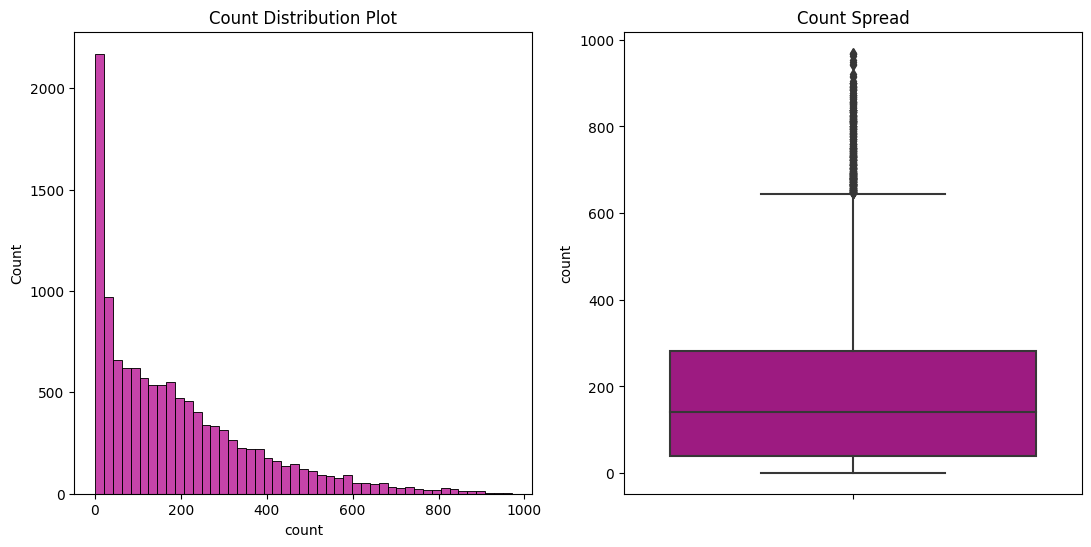

In [18]:
plt.figure(figsize=(13, 6))

plt.subplot(1, 2, 1)
plt.title('Count Distribution Plot')
sns.histplot(data['count'], color='#b3058d') 
plt.ticklabel_format(useOffset=False, style='plain', axis=('x'))

plt.subplot(1, 2, 2)
plt.title('Count Spread')
sns.boxplot(y=data['count'], color='#b3058d')  
plt.ticklabel_format(useOffset=False, style='plain', axis=('y'))

plt.show()

In [19]:
# Cek deskriptif statistik kolom count
data['count'].describe()

count    12151.000000
mean       189.457329
std        181.242898
min          1.000000
25%         40.000000
50%        142.000000
75%        282.000000
max        970.000000
Name: count, dtype: float64

In [20]:
# cek outlier count dengan IQR
q1 = data['count'].quantile(0.25)
q2 = data['count'].quantile(0.50)
q3 = data['count'].quantile(0.75)
iqr = q3 - q1
limit = iqr*1.5
print(f'IQR: {iqr}')
median = q2
print(f'Median: {median}')
lower_bound = q1 - limit
upper_bound = q3 + limit
print(f'Lower_bound: {lower_bound}')
print(f'Upper_bound: {upper_bound}')   

IQR: 242.0
Median: 142.0
Lower_bound: -323.0
Upper_bound: 645.0


Dari grafik dan informasi di atas diketahui bahwa terdapat 75% data pada kolom `count` yang memiliki jumlah kurang dari 282, sedangkan jumlah maksimalnya adalah 970. hal ini menggambarkan adanya skew pada distribusinya, yaitu tail yang memanjang di sebelah kanan (right skew) seperti terlihat pada grafik count distrtibution plot. Kita juga dapat melihat bahwasanya terdapat 338 data yang jumlah count nya lebih besar dari 645 (upper bound IQR), namun hal tersebut (banyaknya sepeda yang berada diatas upper bound) adalah hal yang wajar dan mungkin terjadi, maka dari itu outlier tersebut tidak akan kita hilangkan dan akan tetap kita gunakan untuk prediksi.

## Clean Dataset

In [21]:
# Cek dataset yang sudah bersih
data.head()

,humidity,weather,holiday,season,temperature,hour,count,year,month,day
0,0.81,clear,0,winter,0.24,0,16,2011,1,Saturday
1,0.80,clear,0,winter,0.22,1,40,2011,1,Saturday
2,0.80,clear,0,winter,0.22,2,32,2011,1,Saturday
3,0.75,clear,0,winter,0.24,3,13,2011,1,Saturday
4,0.75,clear,0,winter,0.24,4,1,2011,1,Saturday


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12151 entries, 0 to 12164
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   humidity     12151 non-null  float64 
 1   weather      12151 non-null  object  
 2   holiday      12151 non-null  category
 3   season       12151 non-null  object  
 4   temperature  12151 non-null  float64 
 5   hour         12151 non-null  int64   
 6   count        12151 non-null  int64   
 7   year         12151 non-null  category
 8   month        12151 non-null  category
 9   day          12151 non-null  object  
dtypes: category(3), float64(2), int64(2), object(3)
memory usage: 795.7+ KB


# Modeling
---

Pada tahapan ini, pemodelan akan dilakukan untuk menemukan metrik skor terbaik yang dapat memberikan manfaat bagi stakeholders. Berbagai kombinasi akan diuji untuk mendapatkan model terbaik dengan evaluasi untuk setiap perlakuan. Metrik yang digunakan untuk mengukur kebaikan suatu model juga akan dianalisa dan dipilih berdasarkan relevansinya dengan kondisi bisnis, untuk memastikan hasil terbaik dan efektif.

In [23]:
# Model Algorithm
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.pipeline import Pipeline
from sklearn import linear_model
import statsmodels.api as sm

# Data Preparation
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, RandomizedSearchCV, GridSearchCV, StratifiedKFold, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from category_encoders import OrdinalEncoder
import category_encoders as ce
from sklearn.compose import TransformedTargetRegressor

# Evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer, fbeta_score

### Data splitting

In [24]:
# Memisahkan data independen variabel dengan target
X = data.drop(columns=['count'])
y = data['count'] 

### Train test split

Data akan dibagi menjadi dua dengan rasio 80:20 dalam pemodelan karena memungkinkan penggunaan sebagian besar data untuk melatih model dan memastikan representasi yang memadai. Dengan menyisihkan 30% data untuk test, kita dapat menilai seberapa baik model memprediksi unseen data(test), sementara 70% sisanya dijadikan sebagai data untuk melatih model secara efektif.

In [25]:
# Membagi data training dan test dengan proporsi 80:20
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=11)

### Encoding 

feature-feature kategorikal perlu diubah menjadi feature numerikal agar dapat digunakan untuk modelling. Kita dapat menggunakan `ColumnTransformer` yang dapat diaplikasikan pada pipeline model.

In [26]:
# Mengubah feature kategorikal menjadi numerikal
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(), ['weather', 'season']),
    ('Ordinal', OrdinalEncoder(), ['day','year'])
], remainder='passthrough')

### Benchmarking

Pada tahapan ini, pembandingan akan dilakukan dengan menggunakan berbagai variasi algoritma dan dengan cross validation. Tujuannya adalah untuk mendapatkan estimasi yang dapat diandalkan mengenai seberapa baik model akan bekerja pada data yang tidak terlihat.

In [27]:
# Menentukan metrik
metrics = {'mae': 'neg_mean_absolute_error',
           'mape': 'neg_mean_absolute_percentage_error',
           'rmse': 'neg_root_mean_squared_error',
           'R2': 'r2'}

# Menentukan model 
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=11)
rf = RandomForestRegressor(random_state=11)
gb = GradientBoostingRegressor(random_state=11)
xgb = XGBRegressor(random_state=11)
lgbm = LGBMRegressor(random_state=11)
cat_boost = CatBoostRegressor(random_state=11,verbose=False)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_gb = TransformedTargetRegressor(gb, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)
log_lgbm = TransformedTargetRegressor(lgbm, func=np.log, inverse_func=np.exp)
log_cat_boost = TransformedTargetRegressor(cat_boost, func=np.log, inverse_func=np.exp)


- Analisis akan melibatkan penggunaan berbagai model regresi, termasuk Linear Regression, K-Nearest Neighbors, Decision Tree, Random Forest, Gradient Boosting, XGBoost, LightGBM dan CatBoost. 
- TransformedTargetRegressor atau transformasi skala log akan diterapkan untuk mengatasi distribusi variabel target right skew, terutama ketika berhadapan dengan harga yang miring ke kanan, yang bertujuan untuk meningkatkan akurasi model.

In [28]:
models = [log_lr, log_knn, log_dt, log_rf, log_xgb, log_gb, log_lgbm, log_cat_boost]
model_names = ['LinearRegression', 'KNeighborsRegressor', 'DecisionTreeRegressor', 'RandomForestRegressor', 'XGBRegressor', 'GradientBoosting', 'LightGBM', 'CatBoost']

# list untuk menyimpan hasil
test_mae_arr = []
test_mape_arr = []
test_rmse_arr = []
model_arr = []
test_r2_arr = []

for model, model_name in zip(models, model_names):
    crossval = KFold(n_splits=5)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', model)
    ])

    scores = cross_validate(estimator, X_train, y_train, cv=crossval, scoring=metrics)
    model_arr.append(model_name)
    test_mae_arr.append(abs(scores['test_mae'].mean()))
    test_mape_arr.append(abs(scores['test_mape'].mean()))
    test_rmse_arr.append(abs(scores['test_rmse'].mean()))
    test_r2_arr.append(abs(scores['test_R2'].mean()))
    
model_bench = pd.DataFrame({
    'Model': model_arr,
    'MAE': test_mae_arr,
    'MAPE': test_mape_arr,
    'RMSE': test_rmse_arr,
    'R2': test_r2_arr
})


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 7776, number of used features: 14
[LightGBM] [Info] Start training from score 4.541709
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000091 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 7776, number of used features: 14
[LightGBM] [Info] Start training from score 4.527375
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not 

In [29]:
model_bench.sort_values(by='MAPE',ascending=True)

,Model,MAE,MAPE,RMSE,R2
7,CatBoost,25.180610,0.238516,41.391746,0.947152
4,XGBRegressor,27.478806,0.259157,44.853748,0.937953
6,LightGBM,29.476012,0.269844,47.653725,0.929987
3,RandomForestRegressor,32.004809,0.307642,52.752248,0.914030
2,DecisionTreeRegressor,41.716517,0.420043,72.151813,0.839244
1,KNeighborsRegressor,44.322598,0.424596,72.006615,0.840172
5,GradientBoosting,53.067582,0.449330,84.544166,0.778659
0,LinearRegression,106.493905,1.383641,161.293893,0.198674


Dapat dilihat bahwasanya dari hasil benchmark model, model CatBoost memiliki nilai MAE, MAPE dan RMSE ter-rendah (semakin rendah nilai MAE, MAPE dan RMSE semakin baik pula performa dari model), mengindikasikan model CatBoost adalah model terbaik dan selanjutnya permodelan akan dilakukan dengan model CatBoost.

### Category Boost Algorithm (CatBoost)

Category Boost adalah sebuah algoritma machine learning yang dirancang khusus untuk menangani feature kategorikal secara efisien. Ini adalah pengembangan dari framework gradient boosting dan memiliki kemiripan dengan algoritme seperti XGBoost dan LightGBM. CatBoost menonjol karena kemampuannya menangani variabel kategorikal secara otomatis tanpa memerlukan pengkodean eksplisit, menjadikannya sebagai model yang baik untuk real-world dataset dengan tipe data campuran.

CatBoost menggunakan algoritme canggih yang disebut Ordered Boosting, yang menggabungkan gradient boosting dan ordered target statistics. Teknik ini menjawab tantangan dalam bekerja dengan feature kategorikal dengan memperlakukannya sebagai numerik, memberikan representasi yang lebih akurat dari pola dan ketergantungan yang mendasarinya.

Salah satu keunggulan utama CatBoost adalah kemampuannya untuk menangani variabel kategorikal dari berbagai kardinalitas dan level. CatBoost secara internal memproses feature kategorikal dengan mempertimbangkan kombinasi kategori dan interaksinya, yang membantu menangkap informasi berharga yang mungkin terlewatkan oleh algoritme lain.

Beberapa feature penting dari CatBoost adalah:

1. Penanganan variabel kategorikal: CatBoost menangani feature kategorikal dengan baik, sehingga tidak perlu lagi melakukan pengkodean eksplisit atau rekayasa feature.

2. Penanganan otomatis nilai yang hilang: CatBoost memiliki kemampuan bawaan untuk menangani nilai yang hilang pada feature numerik dan kategorik selama pelatihan, sehingga menyederhanakan tahapan preprocessing.

3. Ketangguhan terhadap outliers: CatBoost dirancang untuk menjadi kuat terhadap outliers dalam data, sehingga mengurangi dampaknya terhadap prediksi model.

4. Fast training and inference: CatBoost memanfaatkan teknik paralelisasi untuk mempercepat training process, sehingga cocok untuk kumpulan data yang besar.

5. Kemampuan interpretasi: CatBoost memberikan wawasan tentang pentingnya feature, sehingga pengguna dapat memahami feature mana yang paling berkontribusi terhadap prediksi model.

CatBoost telah berhasil diterapkan di berbagai domain, termasuk e-commerce, periklanan, dan sistem rekomendasi. Kemampuannya untuk menangani feature kategorikal secara efektif dan kinerjanya yang kompetitif menjadikannya alat yang berharga dalam perangkat ilmuwan data, terutama ketika berhadapan dengan set data dunia nyata yang sering kali berisi campuran variabel numerik dan kategorikal.

### CatBoost model will be tested on the test data from the dataset.

In [30]:
log_cat_boost = TransformedTargetRegressor(cat_boost, func=np.log, inverse_func=np.exp)

models = {'Category Boost Test': log_cat_boost,
}

score_mae_test = []
score_mape_test = []
score_rmse_test = []
score_r2_test = []

for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('model', models[i])
    ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_mae_test.append(mean_absolute_error(y_test, y_pred))
    score_mape_test.append(mean_absolute_percentage_error(y_test, y_pred))
    score_rmse_test.append(mean_squared_error(y_test, y_pred, squared = False))

score_before_tuning = pd.DataFrame({
    'MAE': score_mae_test, 
    'MAPE': score_mape_test, 
    'RMSE': score_rmse_test}, 
    index=models.keys())

In [31]:
train_result = model_bench[7:8].set_index('Model', drop = True)
merged = pd.concat([train_result, score_before_tuning])
merged.reset_index(inplace=True)
merged.drop(columns = 'index', inplace = True)
merged['Model'] = ['CatBoost Train', 'CatBoost Test']
merged.set_index('Model', drop = True)
merged[['Model','MAE', 'MAPE', 'RMSE']]


,Model,MAE,MAPE,RMSE
0,CatBoost Train,25.180610,0.238516,41.391746
1,CatBoost Test,25.648124,0.240899,41.788421


Berdasarkan hasil yang diperoleh, nilai evaluasi metrik pada data train dan test memiliki perbedaan yang relatif kecil, yang mengindikasikan bahwa hanya terdapat sedikit perbedaan antara performa pada data train dan data test, atau dengan kata lain tidak terdapat overfitting yang signifikan. Langkah selanjutnya adalah melakukan tuning hyperparameter dengan tujuan untuk mendapatkan nilai evaluasi metrik yang lebih rendah lagi dibandingkan dengan nilai evaluasi metrik pada data test.

### Hyperparameter Tuning

Selanjutnya, kita fokus untuk mengoptimalkan kinerja model CatBoost melalui Hyperparameter Tuning. Dengan menyempurnakan hyperparameter model, yang bertujuan untuk meningkatkan efektivitas dan mencapai hasil yang lebih baik.

In [32]:
# # mencari parameter terbaik menggukanan Grid Search.
# param_space = {
#     'model__learning_rate': [0.01, 0.1, 0.5],
#     'model__iterations': [175, 275, 300],
#     'model__depth': [i for i in range(7,14,1)],
#     'model__l2_leaf_reg': [i for i in range(4,8,1)]
# }


In [33]:
# simpan best parameter untuk mempercepat proses
param_space = {'model__depth': [10],
 'model__iterations':[275],
 'model__l2_leaf_reg': [5],
 'model__learning_rate': [0.1]}


   - Penjelasan parameter Catboost:
   1. depth: Ini adalah kedalaman maksimum pohon keputusan dalam model CatBoost. Kedalaman pohon mempengaruhi kompleksitas model dan kemampuannya untuk menangkap hubungan yang lebih kompleks dalam data.

   2. iterations: Ini adalah jumlah maksimum iterasi (putaran) yang akan dilakukan oleh model CatBoost. Setiap iterasi menambahkan satu pohon keputusan ke dalam model. Semakin banyak iterasi, semakin banyak pohon yang akan digunakan dalam model.

   3. l2_leaf_reg: Ini adalah parameter regularisasi dalam model CatBoost yang mengontrol kekuatan regularisasi L2 atau penalti L2 yang diterapkan pada bobot daun dalam pohon keputusan. Regularisasi L2 membantu mencegah overfitting dengan menekan nilai bobot yang tinggi dalam model. Nilai l2_leaf_reg yang lebih besar akan menghasilkan regularisasi yang lebih kuat.

   4. learning_rate: Ini adalah learning rate yang digunakan dalam model CatBoost. learning rate mengontrol seberapa cepat model belajar dari kesalahan prediksi sebelumnya. learning rate yang lebih tinggi cenderung menghasilkan konvergensi yang lebih cepat tetapi juga meningkatkan risiko overfitting.

In [34]:
cat_boost = CatBoostRegressor(random_state=11,verbose=False)

estimator = Pipeline([
    ('preprocessing', transformer),
    ('model', cat_boost)])
    
# Melakukan grid search cross-validation 
grid_cat = GridSearchCV(
estimator,
param_grid=param_space,
cv=crossval,
scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
refit='neg_mean_absolute_percentage_error',
n_jobs=-1
)

In [35]:
# Fitting data training untuk mencari parameter terbaik
grid_cat.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('One '
                                                                         'Hot',
                                                                         OneHotEncoder(),
                                                                         ['weather',
                                                                          'season']),
                                                                        ('Ordinal',
                                                                         OrdinalEncoder(),
                                                                         ['day',
                                                                          'year'])])),
                                       ('model',
                                        <catboost.core.CatBoostRegressor object at 0x0000026D27F07700>)]),
             n_jobs=-1,
             param_grid={'model__depth': [10], 'model__iterations': [275],
                         'model__l2_leaf_reg': [5],
                         'model__learning_rate': [0.1]},
             refit='neg_mean_absolute_percentage_error',
             scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_mean_absolute_percentage_error'])

In [36]:
print('Best_score:', grid_cat.best_score_)
print('Best_params:', grid_cat.best_params_)


Best_score: -0.4094070305762245
Best_params: {'model__depth': 10, 'model__iterations': 275, 'model__l2_leaf_reg': 5, 'model__learning_rate': 0.1}


Hyperparameter yang disebutkan di atas digunakan untuk melatih model CatBoost pada dataset tertentu. Performa model kemudian dapat dinilai dengan menggunakan matriks evaluasi yang sesuai untuk mengukur efektivitasnya dalam memprediksi hasil pada unseen data.

### Predict to Test Set With Tuned Model

Memprediksi pada data test menggunakan model Category Boost dengan hyperparameter yang dipilih memungkinkan kita untuk mengevaluasi kinerja model pada unseen data (data test). Dengan menerapkan hyperparameter yang telah diatur, kami bertujuan untuk meningkatkan akurasi prediksi dan kemampuan generalisasi model. Langkah ini sangat penting untuk menilai seberapa baik kinerja model dalam skenario dunia nyata dan memvalidasi keefektifannya dalam membuat prediksi yang akurat pada contoh baru yang tidak terlihat.

In [37]:
cat_boost_tuning = TransformedTargetRegressor(grid_cat.best_estimator_, func=np.log, inverse_func = np.exp)

cat_boost_tuning.fit(X_train, y_train)

y_pred_cat_boost_tuning = cat_boost_tuning.predict(X_test)

mae_cat_boost_tuning = mean_absolute_error(y_test, y_pred_cat_boost_tuning)
mape_cat_boost_tuning = mean_absolute_percentage_error(y_test, y_pred_cat_boost_tuning)
rmse_cat_boost_tuning = mean_squared_error(y_test, y_pred_cat_boost_tuning, squared = False)

score_after_tuning = pd.DataFrame({
    'MAE': mae_cat_boost_tuning,
    'MAPE': mape_cat_boost_tuning,
    'RMSE': rmse_cat_boost_tuning},
    index = ["Category Boost Tuning"])

Berikut merupakan hasil dari hyperparameter tuning pada model dasar CatBoost.

In [38]:
train_result = model_bench[7:8].set_index('Model', drop = True)
merged = pd.concat([train_result, score_after_tuning])
merged.reset_index(inplace=True)
merged.drop(columns = 'index', inplace = True)
merged['Model'] = ['CatBoost Train', 'CatBoost Test']
merged.set_index('Model', drop = True)
merged[['Model','MAE', 'MAPE', 'RMSE']]

,Model,MAE,MAPE,RMSE
0,CatBoost Train,25.180610,0.238516,41.391746
1,CatBoost Test,24.473202,0.235067,39.800681


Berikut adalah perbandingan skor sebelum dan sesudah dilakukan hyperparameter tuning.

In [39]:
score_before_tuning.rename(index={'Category Boost Test': 'CatBoost Before Tuning'}, inplace=True)
score_after_tuning.rename(index={'Category Boost Tuning': 'CatBoost After Tuning'}, inplace=True)
comparison_scores = pd.concat([score_before_tuning, score_after_tuning])
comparison_scores

,MAE,MAPE,RMSE
CatBoost Before Tuning,25.648124,0.240899,41.788421
CatBoost After Tuning,24.473202,0.235067,39.800681


Dari perbandingan nilai MAE, MAPE, dan RMSE sebelum dan sesudah tuning model CatBoost, dapat diperoleh beberapa pengamatan sebagai berikut:

1. MAE: Model CatBoost memiliki nilai MAE 25.648124 sebelum dilakukan tuning, sedangkan setelah dilakukan tuning, MAE sedikit menurun menjadi 24.473202. Hal ini menunjukkan bahwa model yang di tuning bekerja sedikit lebih baik dalam hal kesalahan absolut rata-ratanya, dengan penurunan sebesar 4,8%.

2. MAPE: Model CatBoost mencapai skor MAPE 24,08% sebelum sebelum dilakukan tuning, sedangkan setelah dilakukan tuning, nilai MAPE turun menjadi 23,5%. Serupa dengan MAE, penurunan nilai MAPE menunjukkan bahwa model yang di tuning memiliki persentase kesalahan yang sedikit lebih rendah dalam memprediksi jumlah unit sepeda, dengan penurunan nilai sebesar 0,5%.

3. RMSE: Model CatBoost mencapai nilai RMSE 41.788421 sebelum dilakukan tuning, dan setelah dilakukan tuning, RMSE sedikit menurun menjadi 39.800681. Hal ini mengindikasikan sedikit peningkatan dalam kemampuan model yang telah disetel untuk memprediksi harga mobil bekas secara akurat dengan root mean square error yang lebih rendah.

Secara keseluruhan, penyetelan model CatBoost menghasilkan nilai MAE, MAPE dan RMSE menunjukkan sedikit penurunan.__(matriks penilaian regresi, semakin kecil semakin baik)__

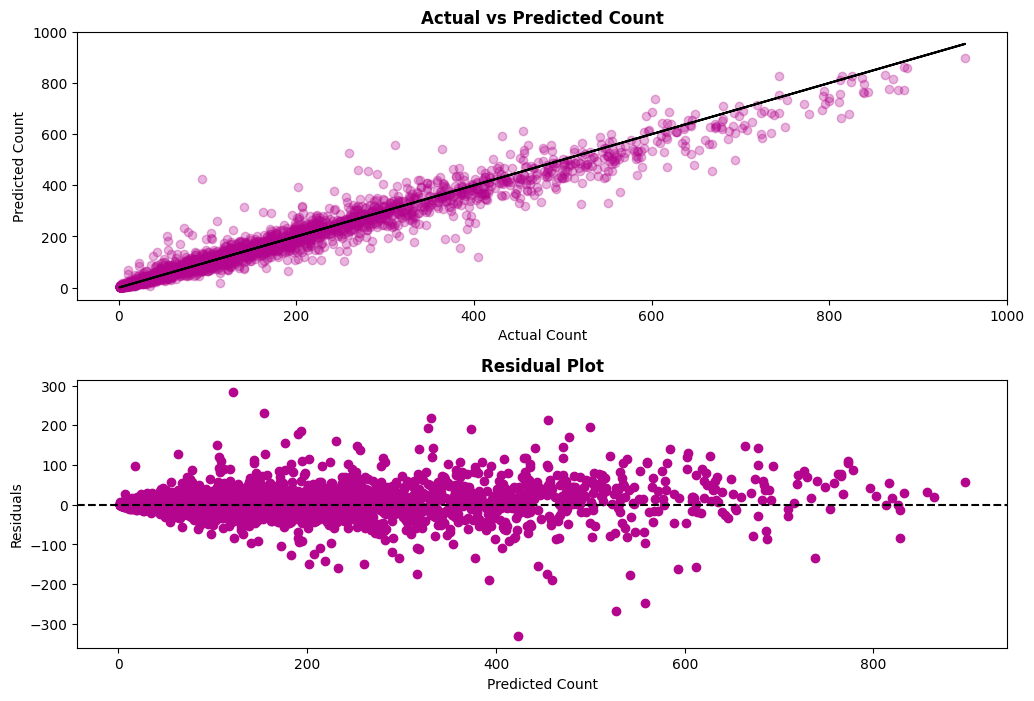

In [40]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot actual vs predicted count
ax1.scatter(y_test, y_pred_cat_boost_tuning, color='#b3058d', alpha=0.3)
ax1.plot(y_test, y_test, color='black', alpha=1)
ax1.set_title('Actual vs Predicted Count', fontweight='bold')
ax1.set_xlabel('Actual Count')
ax1.set_ylabel('Predicted Count')

# Residual plot
residuals = y_test - y_pred_cat_boost_tuning
ax2.scatter(y_pred_cat_boost_tuning, residuals,color='#b3058d')
ax2.axhline(y=0, color='black', linestyle='--')
ax2.set_xlabel('Predicted Count')
ax2.set_ylabel('Residuals')
ax2.set_title('Residual Plot', fontweight='bold')

plt.subplots_adjust(hspace=0.3)
plt.show()

Adanya error yang besar menghasilkan perbedaan yang signifikan antara nilai RMSE dan MAE. Hal ini juga dapat diamati pada plot, di mana terdapat count aktual yang diprediksi jauh lebih tinggi (overestimasi) atau lebih rendah (underestimasi). Namun demikian, nilai MAPE yang diperoleh sekitar 24,08% mengkategorikan model CatBoost sebelum tuning dan sekitar 23,5% untuk model CatBoost setelah tuning sebagai 'reasonable forcasting' karena berada di rentang 20%-50% (Lewis, 1982).

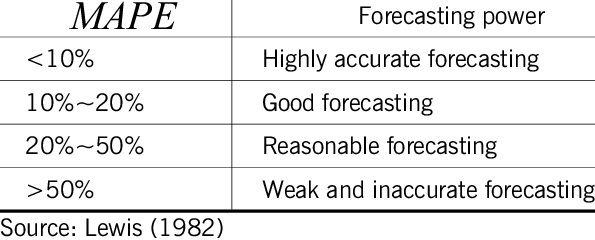

Sumber: Lewis, C.D. (1982). Industrial and Business Forecasting Methods: A Practical Guide to Exponential Smoothing and Curve Fitting..

In [41]:
data_compare = X_test.copy()
data_compare['predict count'] = cat_boost_tuning.predict(X_test)
data_compare['actual count'] = y_test

In [42]:
data_y_pred = pd.DataFrame({'y_test': y_test, 'y_test_pred': y_pred_cat_boost_tuning})
data_y_pred.reset_index(drop=True, inplace=True)
data_y_pred.sort_values('y_test').head(20)

list_ranges = [
    ("<50", 0, 50),
    ("51-100", 51, 100),
    ("101-150", 101, 150),
    ("151-200", 151, 200),
    ("201-250", 201, 250),
    ("251-300", 251, 300),
    ("301-350", 301, 350),
    ("351-400", 351, 400),
    ("401-450", 401, 450),
    ("451-500", 451, 500),
    ("501-550", 501, 550),
    ("551-600", 551, 600),
    (">600", 601, float('inf')),
    ("All Range (Max 953)", 0, float('inf'))
]

list_mae = []
list_mape = []
list_len = []

for range_name, min_value, max_value in list_ranges:
    range_data = data_y_pred[(data_y_pred['y_test'] > min_value) & (data_y_pred['y_test'] <= max_value)]
    score_mae = mean_absolute_error(range_data['y_test'], range_data['y_test_pred'])
    score_mape = mean_absolute_percentage_error(range_data['y_test'], range_data['y_test_pred'])
    len_data = len(range_data)

    list_mae.append(score_mae)
    list_mape.append(score_mape * 100)
    list_len.append(len_data)

range_metrics = pd.DataFrame({
    "Range Count": [range_name for range_name, _, _ in list_ranges],
    "Score MAE": list_mae,
    "Score MAPE (%)": list_mape,
    "Jumlah Data": list_len
})

range_metrics


,Range Count,Score MAE,Score MAPE (%),Jumlah Data
0,<50,6.078079,45.488770,671
1,51-100,19.591059,26.595064,292
2,101-150,22.672388,18.366150,254
3,151-200,22.540820,12.794592,253
4,201-250,29.178380,13.229117,202
5,251-300,33.392572,12.205004,166
6,301-350,38.470842,11.862809,122
7,351-400,39.874163,10.544397,95
8,401-450,39.293673,9.320249,74
9,451-500,49.036254,10.390663,68


Berdasarkan plot dan tabel di atas, model ini hanya baik untuk memprediksi jumlah unit sepeda diatas 50. Kemampuan prediksi dinilai berdasarkan metrik evaluasi MAPE untuk setiap rentang harga yang dibandingkan dengan metrik evaluasi MAPE untuk seluruh data test. MAPE dipilih sebagai metrik evaluasi karena metrik ini dapat menghitung persentase perbedaan antara harga prediksi dan harga aktual. Terlihat bahwa performa prediksi kurang baik untuk memprediksi jumlah unit sepeda bawah 50, dengan nilai MAPE mencapai 45,48%. Di luar rentang ini, model dianggap baik karena dapat memprediksi jumlah unit sepeda dengan nilai MAPE yang mendekati MAPE data test.

### feature importance

<Axes: title={'center': 'feature Importances'}>

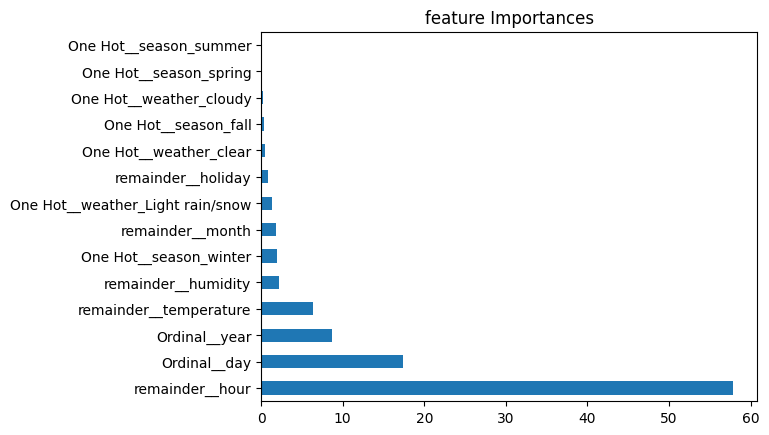

In [43]:
# Mendapatkan estimator terbaik dari GridSearchCV dan ekstraksi nama feature
best_model = grid_cat.best_estimator_
column_transformer_step = best_model.steps[0][1]
feature_names = column_transformer_step.get_feature_names_out()

# CatBoost model dan feature importance
cat_boost_model = best_model.steps[-1][1]
feature_importances = cat_boost_model.feature_importances_

# feature importance
feature_imp = pd.Series(feature_importances, index=feature_names)
feature_imp = feature_imp.sort_values(ascending=False)
feature_imp.plot(kind='barh', title='feature Importances')


# Conclusion

Berdasarkan pemodelan yang telah dilakukan, feature `hour`, `day`, dan `year` menjadi feature yang paling berpengaruh terhadap `count`

Metriks evaluasi yang digunakan pada model ini adalah nilai MAE, MAPE, dan RMSE. Ditinjau dari nilai MAPE yang dihasilkan oleh model setelah melakukan hyperparameter tuning (23,5%), dapat disimpulkan bahwasanya ketika model digunakan untuk memperkirakan jumlah unit sepeda yang harus disediakan pada rentang nilai yang sudah dilatih terhadap model (jumlah unit sepeda maksimal 970), maka perkiraan jumlahnya rata-rata akan meleset kurang lebih sebesar 23,5% dari jumlah yang seharusnya.

Ketika dilihat dari hasil pengelompokkan berdasarkan rentang target dan visualisasi residual, terdapat limitasi pada model dimana model baru dapat memprediksi dengan baik untuk jumlah unit sepeda di atas 50 unit, dengan hasil nilai evaluasi metrik (MAPE) yang masih cukup baik dan masuk kedalam kategori reasonable. Tentu tidak menutup kemungkinan bahwasanya prediksi yang dihasilkan bisa meleset lebih jauh. Adanya bias tersebut dihasilkan karena terbatasnya feature yang terdapat pada dataset yang berkaitan dengan target (count/jumlah unit sepeda yang disewa) seperti feature yang mampu merepresentasikan keadaan dimana calon pelanggan memutuskan untuk menggunakan jasa peminjaman sepeda seperti lokasi stasiun sepeda, jarak antar stasiun sepeda, waktu penggunaan sepeda, dll

# Recomendation

Berikut merupakan rekomendasi yang dapat dilakukan untuk pengembangan model:

1. Adanya penambahan data dan kelengkapan dataset, dataset yang digunakan hanya dalam rentang tahun 2011-2012 dan tidak mencatat semua waktu didalam tahun tersebut dimana dalam rentang waktu 2011-2012 seharusnya dataset yang lengkap akan mempunyai jumlah poin data sebanyak: 731* hari x 24 jam = 17544, sedangkan dataset yang tersedia hanya terdiri dari 12165 poin data. Walaupun dataset lengkap secara hari karena unique value tanggal sebanyak 731 yang sesuai dengan jumlah hari di tahun 2011 dan 2012,maka kekurangan data disebabkan oleh tidak lengkapnya data secara jam.

2. Penambahan feature yang memiliki korelasi yang lebih baik terhadap target (`count`), seperti lokasi stasiun sepeda dan jarak antar stasiun sepeda, pencatatan waktu penggunaan sepeda.

3. Model yang sudah dibuat dapat digunakan untuk mengembangkan pembuatan model yang lain. Seperti memprediksi supply dan demand total unit sepeda yang disewa pada tiap stasiun sepeda. Dimana nantinya dapat digunakan sebagai acuan Capital Bikeshare dalam penyediaan sepeda pada masing masing statiun sepeda atau sebagai pertimbangan untuk menambah stasiun sepeda di lokasi-lokasi yang lebih strategis.

# Save Model

In [44]:
# import pickle

# pickle.dump(cat_boost_tuning, open('Bike_demand_model.sav', 'wb'))  